In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

In [3]:
train = pd.read_csv('./train.csv')
print(train.head())
print(train.info())
print("\n SHape of the dataset:", train.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [4]:
#NaN values in the dataset ?
nan = train.isnull().sum()
print(nan[nan != 0])

Series([], dtype: int64)


In [7]:
#Displays 4 handwritten digit images
def display_digits(N):
    """Picks-up randomly N images within the 
    train dataset between 0 and 41999 and displays the images
    with 4 images/row"""
    
    train = pd.read_csv('./train.csv')
    images = np.random.randint(low=0, high=42001, size=N).tolist()
    
    subset_images = train.iloc[images,:]
    subset_images.index = range(1, N+1)
    print("Handwritten picked-up digits: ", subset_images['label'].values)
    subset_images.drop(columns=['label'], inplace=True)

    for i, row in subset_images.iterrows():
        plt.subplot((N//8)+1, 8, i)
        pixels = row.values.reshape((28,28))
        plt.imshow(pixels, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.title('Randomly picked-up images from the training dataset')
    plt.show()

    return ""

Handwritten picked-up digits:  [3 6 9 0 3 5 1 6 6 7 2 3 1 9 4 2 3 0 8 0 0 2 9 5 7 8 9 6 0 0 8 7 9 2 5 6 0
 4 3 4]


/home/eligoodale1/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


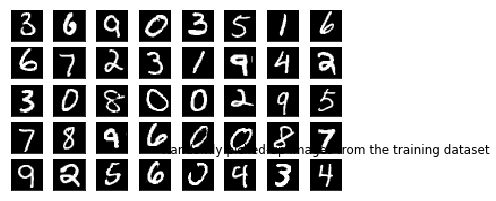

''

In [8]:
display_digits(40)

In [9]:
subset_pixels = train.iloc[:, 1:]
subset_pixels.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


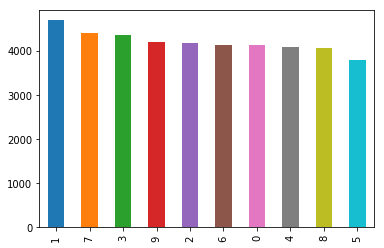

In [10]:
#Distribution of the digits in the dataset
_ = train['label'].value_counts().plot(kind='bar')
plt.show()

/home/eligoodale1/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


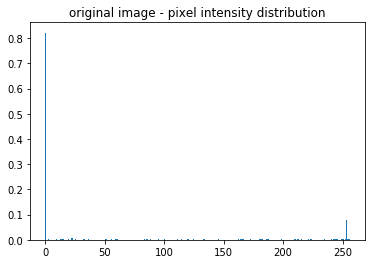

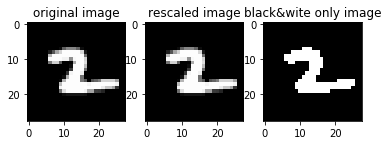

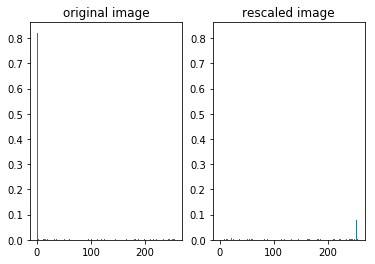

In [11]:
#Pick-up one random image from original training set
i = np.random.randint(low=0, high=42001, size=1).tolist()[0]
pixels = train.iloc[i, 1:]
image = train.iloc[i, 1:].values.reshape((28,28))

#Pixel intensity hstogram
plt.hist(pixels, bins=256, range=(0,256), normed=True)
plt.title('original image - pixel intensity distribution')
plt.show()

#Rescaling the intensity
pmin, pmax = image.min(), image.max()
rescaled_image = 255*(image-pmin) / (pmax - pmin)
rescaled_pixels = rescaled_image.flatten()

#Only black or white pixels
bw_pixels = pixels.apply(lambda x: 0 if x<128 else 255)
bw_image = bw_pixels.values.reshape((28,28))


#Visual comparison of images
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('original image')
plt.subplot(1, 3, 2)
plt.imshow(rescaled_image, cmap='gray')
plt.title('rescaled image')
plt.subplot(1, 3, 3)
plt.imshow(bw_image, cmap='gray')
plt.title('black&wite only image')
plt.show()


#Visual Histogram comparison
plt.subplot(1, 2, 1)
plt.hist(pixels, bins=256, range=(0,256), normed=True)
plt.title('original image')
plt.subplot(1, 2, 2)
plt.hist(rescaled_pixels, bins=256, range=(0,256), normed=True)
plt.title('rescaled image')
plt.show()